## FASHION MNIST DATASET
In this notebook I aim to successfuly classify the famous fashion mnist dataset.

> Data Acquisition Credit:
Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747

>> Code by:
@semaxspaul

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Loading fashion data using the 'keras' API by tensorflow
fashion_data = keras.datasets.fashion_mnist

> Pre-processing Data

In [ ]:
# Splitting data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

In [ ]:
# Label names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Scaling the pixel values to a range between (0~1)
train_images = train_images/255.0
test_images = test_images/255.0

> Training a model

In [ ]:
from keras.api._v2.keras import activations
# Defining the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Model Test Accuracy is: {test_accuracy}")

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4959 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3718 - accuracy: 0.8670
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3340 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3115 - accuracy: 0.8851
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3653 - accuracy: 0.8708
Model Test Accuracy is: 0.8708000183105469


In [ ]:
# Editing the model hyperparameters to see if it gives better accuracy

# In this case I increased the num_epochs = 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Model Test Accuracy is: {test_accuracy}")

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4970 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3749 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3345 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3119 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2959 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2794 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2693 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2569 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2456 - accuracy: 0.9071
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3198 

> Making Predictions using the model

313/313 [==============================] - 1s 2ms/step


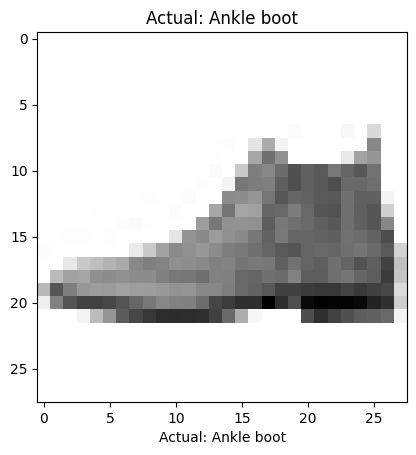

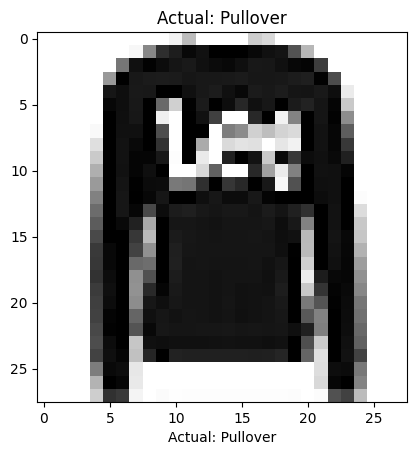

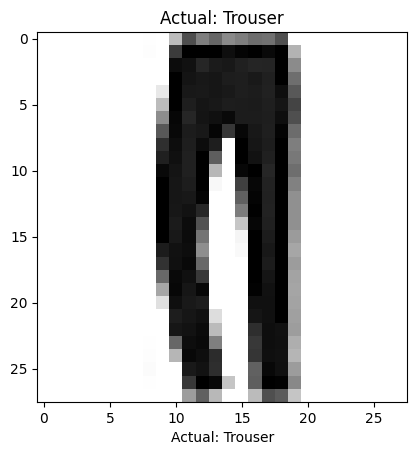

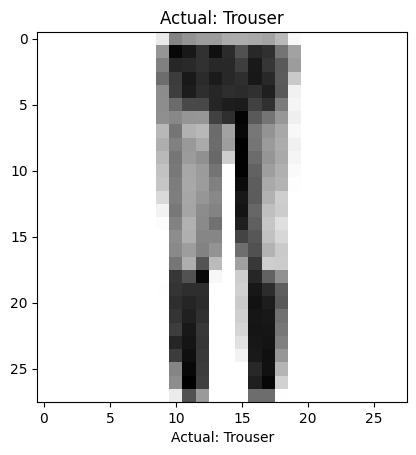

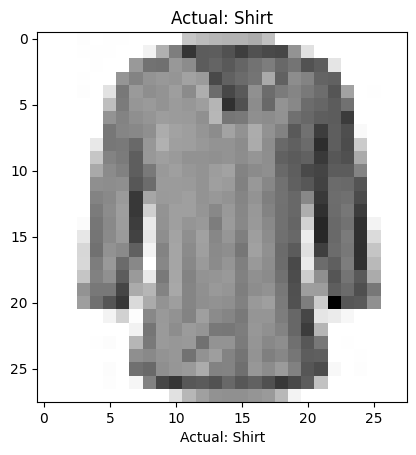

In [ ]:
model_predictions = model.predict(test_images)

# for one image prediction
# model_prediction = model.predict([test_images[i]]) // output = [arrayOfValues]


# Below is a result for the first 5 images in the test set
for index in range(5):
  plt.grid(False)
  plt.imshow(test_images[index], cmap=plt.cm.binary)
  plt.xlabel(f"Actual: {class_names[test_labels[index]]}")
  plt.title(f"Actual: {class_names[np.argmax(model_predictions[index])]}")
  plt.show()

> This has been my first project of classifying using deep learning algorithms and employing the TensorFlow Framework

> Dataset License
>> MIT License | Copyright (c) 2017 François Chollet